Pandas is a Python library for handling structured data (e.g., csv files) that comes with statistical tools, convenient data importing functions and tools to filter and extract data. Its key data structure is called the "DataFrame". This allows you to store and manipulate tabular data, similar to an Excel sheet. It behaves in some ways like a generalization of dictionaries to associate more than 2 objects.

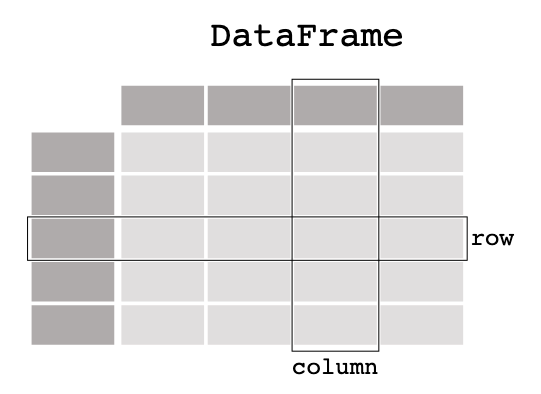

Unlike a NumPy array, a Dataframe can contain multiple data types, such as numbers and text, but the data in each column must be of the same type. 

A DataFrame can be read from different data sources, such as CSV files or Excel files (using the read_csv() function), or created from scratch. For example, to create a dataset containing information about chemical compounds, such as molecular weights, boiling points, and solubilities: 

In [1]:
import pandas as pd

data = {
    'Compound': ['Water', 'Ethanol', 'Benzene', 'Methanol', 'Acetone', 'Toluene', 'Tetrachloroethylene'],
    'MolecularWeight': [18.015, 46.07, 78.1134, 32.042, 58.08, 92.14, 165.8],
    'BoilingPoint': [100, 78.37, 80.1, 64.7, 56.08, 110.6, 121.2],
    'Solubility': ['Infinite', 'Miscible', '0.178 g/100 mL', 'Miscible', 'Miscible', 'None', '206 mg/L']
}

df = pd.DataFrame(data)

To  view the first 5 rows and access the names of the columns: 

In [2]:
df.head(5)

,Compound,MolecularWeight,BoilingPoint,Solubility
0,Water,18.0150,100.00,Infinite
1,Ethanol,46.0700,78.37,Miscible
2,Benzene,78.1134,80.10,0.178 g/100 mL
3,Methanol,32.0420,64.70,Miscible
4,Acetone,58.0800,56.08,Miscible


In [3]:
df.columns

Index(['Compound', 'MolecularWeight', 'BoilingPoint', 'Solubility'], dtype='object')

To print summary statistics for each column in the DataFrame, use describe(): 

In [4]:
df.describe()

,MolecularWeight,BoilingPoint
count,7.000000,7.000000
mean,70.037200,87.292857
std,49.314667,24.050028
min,18.015000,56.080000
25%,39.056000,71.535000
50%,58.080000,80.100000
75%,85.126700,105.300000
max,165.800000,121.200000


To get the unique values in a column

In [5]:
unique_values = df['Solubility'].unique()
unique_values

array(['Infinite', 'Miscible', '0.178 g/100 mL', 'None', '206 mg/L'],
      dtype=object)

You can access a specific column by using indexing with the column name:

In [6]:
MW = df['MolecularWeight']
MW

0     18.0150
1     46.0700
2     78.1134
3     32.0420
4     58.0800
5     92.1400
6    165.8000
Name: MolecularWeight, dtype: float64

Or by a vertical (column) slicing:

In [7]:
df.loc[:, 'MolecularWeight']

0     18.0150
1     46.0700
2     78.1134
3     32.0420
4     58.0800
5     92.1400
6    165.8000
Name: MolecularWeight, dtype: float64

Similarly, rows can be accessed by doing a horizontal (row) slicing df['rowname', :]. You can also locate a specific cell using the loc() method: 

In [8]:
df.loc[2, 'MolecularWeight'] #'2' for the row number

78.1134

You can add new columns to existing DataFrames. For example, to convert the boiling points from Celsius to Fahrenheit and add this as a new column: 

In [9]:
df['BoilingPoint (°F)'] = df['BoilingPoint']*1.8 + 32
df.head()

,Compound,MolecularWeight,BoilingPoint,Solubility,BoilingPoint (°F)
0,Water,18.0150,100.00,Infinite,212.000
1,Ethanol,46.0700,78.37,Miscible,173.066
2,Benzene,78.1134,80.10,0.178 g/100 mL,176.180
3,Methanol,32.0420,64.70,Miscible,148.460
4,Acetone,58.0800,56.08,Miscible,132.944


To filter the DataFrame based on a given condition, you can use boolean indexing. For example, to find and select all compounds with a molecular weight above 50 and store them into a new DataFrame:

In [10]:
filtered_df = df[df['MolecularWeight'] > 50]
filtered_df

,Compound,MolecularWeight,BoilingPoint,Solubility,BoilingPoint (°F)
2,Benzene,78.1134,80.10,0.178 g/100 mL,176.180
4,Acetone,58.0800,56.08,Miscible,132.944
5,Toluene,92.1400,110.60,None,231.080
6,Tetrachloroethylene,165.8000,121.20,206 mg/L,250.160


It is possible to sort the DataFrame, for example, based on a particular column, using sort_values(). To sort the compounds based on their molecular weights in ascending order: 

In [11]:
sorted_df = df.sort_values('MolecularWeight', ascending=True)
sorted_df

,Compound,MolecularWeight,BoilingPoint,Solubility,BoilingPoint (°F)
0,Water,18.0150,100.00,Infinite,212.000
3,Methanol,32.0420,64.70,Miscible,148.460
1,Ethanol,46.0700,78.37,Miscible,173.066
4,Acetone,58.0800,56.08,Miscible,132.944
2,Benzene,78.1134,80.10,0.178 g/100 mL,176.180
5,Toluene,92.1400,110.60,None,231.080
6,Tetrachloroethylene,165.8000,121.20,206 mg/L,250.160


It is possible to group and aggregate data based on a specific property. This can be useful for analyzing data.

In [12]:
#Group by solubility
grouped_df = df.groupby('Solubility')

#Calculate the mean molecular weight for each group
mean_mw = grouped_df['MolecularWeight'].mean()

#Calculate the maximum boiling point for each group
max_bp = grouped_df['BoilingPoint'].max()

EXERCISE: Analyzing Chemical Data with Pandas

Provide the students with a CSV file named "chemical_data.csv" containing information about different chemical compounds. The dataset includes the following columns: 

CompoundName
MolecularWeight
BoilingPoint
Solubility

Use Pandas to read the chemical_data.csv file and create a DataFrame. Explore the first few rows of the DataFrame.

1) Find the compound with the highest boiling point using Pandas
2) Print the compounds with a solubility greater than 1 g/100 mL
3) Calculate the average molecular weight of the compounds and save this as a new column
4) Write the DataFrame to file using to_csv(). 

Pandas can also be combined with other libraries such as Matplotlib to visualise the data. For example, we can create a scatter plot between the molecular weight and the boiling points.

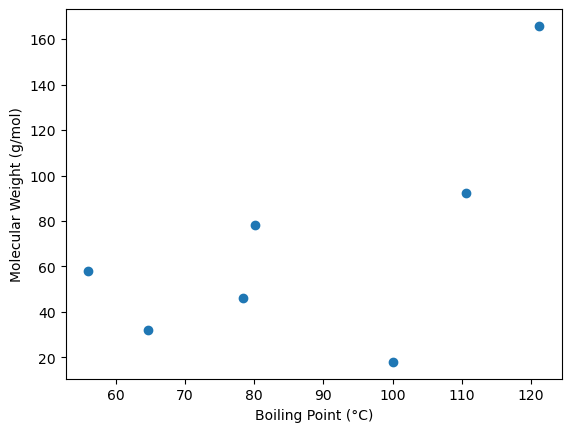

In [13]:
import matplotlib.pyplot as plt

plt.scatter(df['BoilingPoint'], df['MolecularWeight'])
plt.xlabel('Boiling Point (°C)')
plt.ylabel('Molecular Weight (g/mol)')
plt.show()

Here, we will used the cheminformatics library RDKit to calculate descriptors for a dataset containing chemical structures in the form of smiles.

In [14]:
from rdkit import Chem
from rdkit.Chem import Descriptors

#Read the dataset as SMILES string < TO BE DONE
df = pd.read_csv('smiles.csv')

def calculate_descriptor(smiles, descriptor): 
    mol = Chem.MolFromSmiles(smiles) # Load the molecule from the SMILES string
    return descriptor()

df['MolecularWeight'] = df['SMILES'].apply(lambda x: calculate_descriptor(x, Descriptors.MolWt))

ModuleNotFoundError: No module named 'rdkit'